## general tests

In [39]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("GeneTonic", update = TRUE)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.14 (BiocManager 1.30.18), R 4.1.3 (2022-03-10)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'GeneTonic'”
Old packages: 'AnnotationDbi', 'backbone', 'BiocFileCache', 'biomaRt', 'clue',
  'farver', 'GenomeInfoDb', 'htmltools', 'igraph', 'later', 'limma', 'NMF',
  'pcaExplorer', 'pkgload', 'PoissonBinomial', 'Rcpp', 'RcppArmadillo',
  'rlang', 'RSQLite', 'S4Vectors', 'sass', 'stringi', 'xfun'



In [38]:
R.version

               _                           
platform       x86_64-conda-linux-gnu      
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          1.3                         
year           2022                        
month          03                          
day            10                          
svn rev        81868                       
language       R                           
version.string R version 4.1.3 (2022-03-10)
nickname       One Push-Up                 

In [35]:
library(GeneTonic)
library(pcaExplorer)
library(topGO)

library(dplyr)
library(stringr)
library(tidyr)
library(DESeq2)

In [23]:
#part1
#dea_Hordeum_vulgare <- readRDS("DESeqDataSet_Hordeum_vulgare")
dea_Hordeum_vulgare <- readRDS("final_dea_Hordeum_vulgare")

##rownames(dea_Hordeum_vulgare) <- substr(rownames(dea_Hordeum_vulgare), 1, 15)
#dea_Hordeum_vulgare

#keep <- rowSums(counts(dea_Hordeum_vulgare) >= 10) >= 6
#dea_Hordeum_vulgare <- dea_Hordeum_vulgare[keep, ]
#dea_Hordeum_vulgare

#dea_Hordeum_vulgare
rowData(dea_Hordeum_vulgare) <- rowData(dea_Hordeum_vulgare) %>%
  as.data.frame() %>%
  mutate(gene_id=rownames(.), SYMBOL=rownames(.)) %>%
  dplyr::select(gene_id, SYMBOL)

dea_Hordeum_vulgare

class: DESeqDataSet 
dim: 6518 6 
metadata(1): version
assays(6): counts avgTxLength ... H cooks
rownames(6518): HORVU2Hr1G000010 HORVU2Hr1G000030 ... HORVU2Hr1G127750
  HORVU2Hr1G127770
rowData names(2): gene_id SYMBOL
colnames(6): Scarlett_control_1 Scarlett_control_2 ...
  Scarlett_treatment_2 Scarlett_treatment_3
colData names(8): species sample ... fragment_length_mean
  fragment_length_sd

In [46]:
#alt part1
#dea_Hordeum_vulgare <- readRDS("DESeqDataSet_Hordeum_vulgare")
dea_Hordeum_vulgare <- readRDS("final_dea_Hordeum_vulgare")

##rownames(dea_Hordeum_vulgare) <- substr(rownames(dea_Hordeum_vulgare), 1, 15)
#dea_Hordeum_vulgare

#keep <- rowSums(counts(dea_Hordeum_vulgare) >= 10) >= 6
#dea_Hordeum_vulgare <- dea_Hordeum_vulgare[keep, ]
#dea_Hordeum_vulgare

#dea_Hordeum_vulgare
rowData(dea_Hordeum_vulgare) <- rowData(dea_Hordeum_vulgare) %>%
  as.data.frame() %>%
  mutate(gene_id=rownames(.)) %>%
  dplyr::select(gene_id) %>%
  dplyr::left_join(., SFA_species, by=c("gene_id"="Protein-Accession")) %>%
  dplyr::rename(SYMBOL="Human-Readable-Description") %>%
  dplyr::select(gene_id, SYMBOL)


rowData(dea_Hordeum_vulgare)

DataFrame with 6518 rows and 2 columns
                          gene_id                 SYMBOL
                      <character>            <character>
HORVU2Hr1G000010 HORVU2Hr1G000010 Polycomb group prote..
HORVU2Hr1G000030 HORVU2Hr1G000030    Ethylene receptor 2
HORVU2Hr1G000040 HORVU2Hr1G000040 SAP30_Sin3_bdg domai..
HORVU2Hr1G000050 HORVU2Hr1G000050 Non-functional NADPH..
HORVU2Hr1G000060 HORVU2Hr1G000060                     NA
...                           ...                    ...
HORVU2Hr1G127720 HORVU2Hr1G127720 MHD2 domain-containi..
HORVU2Hr1G127730 HORVU2Hr1G127730 ATP synthase subunit..
HORVU2Hr1G127740 HORVU2Hr1G127740 Dolichyl-diphosphool..
HORVU2Hr1G127750 HORVU2Hr1G127750 Pentatricopeptide re..
HORVU2Hr1G127770 HORVU2Hr1G127770 Histone-lysine N-met..

In [48]:
counts(dea_Hordeum_vulgare)

,Scarlett_control_1,Scarlett_control_2,Scarlett_control_3,Scarlett_treatment_1,Scarlett_treatment_2,Scarlett_treatment_3
HORVU2Hr1G000010,51,55,57,62,46,36
HORVU2Hr1G000030,28,19,28,33,34,43
HORVU2Hr1G000040,53,61,55,26,24,36
HORVU2Hr1G000050,1,2,1,5,0,3
HORVU2Hr1G000060,7,21,0,0,0,0
HORVU2Hr1G000090,9,13,6,231,258,172
HORVU2Hr1G000130,7,7,2,7,6,2
HORVU2Hr1G000140,2,1,1,1,1,0
HORVU2Hr1G000150,0,0,1,0,0,0
HORVU2Hr1G000160,0,0,0,0,0,0


In [287]:
rowData(dea_Hordeum_vulgare)$SYMBOL

NULL

In [47]:
#part2
dea_Hordeum_vulgare_filtered <- readRDS("final_dea_Hordeum_vulgare")
keep <- rowSums(counts(dea_Hordeum_vulgare_filtered) >= 10) >= 6
dea_Hordeum_vulgare_filtered <- dea_Hordeum_vulgare_filtered[keep, ]


description <- rowData(dea_Hordeum_vulgare_filtered) %>%
  as.data.frame() %>%
  mutate(gene_id=rownames(.)) %>%
  dplyr::left_join(., SFA_species, by=c("gene_id"="Protein-Accession")) %>%
  dplyr::rename(SYMBOL="Human-Readable-Description") %>%
  pull(SYMBOL)

length(description)

#rowData(dea_Hordeum_vulgare_filtered)

results_dea_Hordeum_vulgare <- results(dea_Hordeum_vulgare_filtered)

#results_dea_Hordeum_vulgare <- results_dea_Hordeum_vulgare %>%
  #as.data.frame() %>%
#  deseqresult2df(., FDR = 0.1) %>%
  #mutate(SYMBOL=rownames(.))


#former way
#results_dea_Hordeum_vulgare$SYMBOL <- rownames(rowData(dea_Hordeum_vulgare_filtered))
results_dea_Hordeum_vulgare$SYMBOL <- description


results_dea_Hordeum_vulgare %>%
  head()



[1] 2016

log2 fold change (MLE): condition treatment vs control 
Wald test p-value: condition treatment vs control 
DataFrame with 6 rows and 7 columns
                  baseMean log2FoldChange     lfcSE      stat      pvalue
                 <numeric>      <numeric> <numeric> <numeric>   <numeric>
HORVU2Hr1G000010   51.2349     -0.3729601  0.331903  -1.12370 2.61139e-01
HORVU2Hr1G000030   31.2080      0.6975023  0.417256   1.67164 9.45952e-02
HORVU2Hr1G000040   42.1034     -0.8056738  0.376167  -2.14180 3.22098e-02
HORVU2Hr1G000270   24.8959     -0.0885774  0.455810  -0.19433 8.45918e-01
HORVU2Hr1G000280  118.2649     -1.5892563  0.246639  -6.44365 1.16637e-10
HORVU2Hr1G000360   43.2284      0.4085470  0.350440   1.16581 2.43691e-01
                        padj                 SYMBOL
                   <numeric>            <character>
HORVU2Hr1G000010 4.34774e-01 Polycomb group prote..
HORVU2Hr1G000030 2.02415e-01    Ethylene receptor 2
HORVU2Hr1G000040 8.74596e-02 SAP30_Sin3_bdg domai..
HORVU

In [17]:
#part 3 res_enrich -need to create seperate for all ontologies


In [5]:
SFA <- readRDS("species_functional_annotation.rds")

In [6]:
SFA$Zea_mays

Protein-Accession,Blast-Hit-Accession,AHRD-Quality-Code,Human-Readable-Description,Gene-Ontology-Term
<chr>,<chr>,<chr>,<chr>,<chr>
Zm00001d001763,UniRef90_A0A1Z5RGV2,***,Polysacc_synt_4 domain-containing protein,"GO:0000139, GO:0005794, GO:0009834, GO:0016020, GO:0016021, GO:0045492, GO:0071554"
Zm00001d001765,sp|Q9LZD3|E70A1_ARATH,***,Exocyst complex component EXO70A1,"GO:0000145, GO:0005515, GO:0005546, GO:0005576, GO:0005737, GO:0005829, GO:0005856, GO:0005886, GO:0006887, GO:0009524, GO:0010089, GO:0016020, GO:0031410, GO:0048759, GO:0060178, GO:0090059, GO:2000652"
Zm00001d001766,UniRef90_A0A804J9K2,***,(wild Malaysian banana) hypothetical protein,GO:0016787
Zm00001d001767,sp|Q8L765|BPM1_ARATH,***,BTB/POZ and MATH domain-containing protein 1,"GO:0005515, GO:0005634, GO:0006970, GO:0016567, GO:0042631, GO:0042802, GO:0071472"
Zm00001d001769,UniRef90_A0A3L6FT79,***,RING-type E3 ubiquitin transferase,"GO:0002679, GO:0004842, GO:0005737, GO:0005829, GO:0006952, GO:0009414, GO:0016567, GO:0016740, GO:0051865, GO:0061630"
Zm00001d001770,sp|P49398|RS4_ORYSJ,*-*,40S ribosomal protein S4,"GO:0003723, GO:0003735, GO:0005737, GO:0005840, GO:0006412, GO:0019843, GO:0022627"
Zm00001d001771,UniRef90_C0P9F8,***,Peptidase A1 domain-containing protein,"GO:0004190, GO:0005576, GO:0006508, GO:0008233, GO:0016787"
Zm00001d001772,UniRef90_A0A835E0V1,***,LEA_2 domain-containing protein,"GO:0005886, GO:0006952, GO:0009506, GO:0009507, GO:0016020, GO:0016021, GO:0046658, GO:0051607, GO:0098542"
Zm00001d001773,UniRef90_A0A3L6G2S5,***,Pentatricopeptide repeat-containing protein,"GO:0003723, GO:0008270, GO:0009451, GO:0043231"


In [11]:
head(SFA_species)

Protein-Accession,Blast-Hit-Accession,AHRD-Quality-Code,Human-Readable-Description,Gene-Ontology-Term
<chr>,<chr>,<chr>,<chr>,<chr>
HORVU2Hr1G000010,sp|Q69KN0|EMF2B_ORYSJ,***,Polycomb group protein EMF2B,"GO:0005634, GO:0005677, GO:0006325, GO:0009908, GO:0030154, GO:0031490, GO:0031507, GO:0031519, GO:0046872, GO:0048586, GO:0070734"
HORVU2Hr1G000030,sp|Q7XX84|ETR2_ORYSJ,***,Ethylene receptor 2,"GO:0000160, GO:0000166, GO:0004672, GO:0004673, GO:0005524, GO:0005783, GO:0005789, GO:0009723, GO:0009873, GO:0016020, GO:0016021, GO:0016301, GO:0016310, GO:0016740, GO:0018106, GO:0038199, GO:0046872, GO:0051740"
HORVU2Hr1G000040,UniRef90_A0A3B6AP04,***,SAP30_Sin3_bdg domain-containing protein,GO:0005634
HORVU2Hr1G000050,sp|Q9SQ64|COR2_PAPSO,*-*,Non-functional NADPH-dependent codeinone reductase 2,"GO:0004032, GO:0005829, GO:0016491, GO:0016616, GO:0019290, GO:0033707, GO:0034224, GO:1990641"
HORVU2Hr1G000090,sp|P49598|P2C37_ARATH,*-*,Protein phosphatase 2C 37,"GO:0004721, GO:0004722, GO:0005515, GO:0005634, GO:0005829, GO:0009738, GO:0016787, GO:0017018, GO:0043169, GO:0046872"
HORVU2Hr1G000130,sp|Q9LDD4|ARID2_ARATH,*-*,AT-rich interactive domain-containing protein 2,"GO:0000118, GO:0003677, GO:0005515, GO:0005634, GO:0005773"


In [48]:
#quick solution to generate an all OGs set (no singletons! for now)
SFA_species <- SFA[["Hordeum_vulgare"]]

all_set <- bind_rows(SFA_species) %>%
  dplyr::select(`Protein-Accession`, `Gene-Ontology-Term`) %>%
  #we should remove all rows that have NO GO terms associated
  #and remove all NAs from the Gene-Ontology-Term column if they have at least 1 GO term
  #remove inline NAs in Gene-Ontology-Term column
  mutate(
    `Gene-Ontology-Term` = str_remove_all(`Gene-Ontology-Term`, "NA, |, NA") 
  ) %>% 
  #remove lines with only NA in Gene-Ontology-Term column
  filter(!str_detect(`Gene-Ontology-Term`, 'NA'))

head(all_set)

Protein-Accession,Gene-Ontology-Term
<chr>,<chr>
HORVU2Hr1G000010,"GO:0005634, GO:0005677, GO:0006325, GO:0009908, GO:0030154, GO:0031490, GO:0031507, GO:0031519, GO:0046872, GO:0048586, GO:0070734"
HORVU2Hr1G000030,"GO:0000160, GO:0000166, GO:0004672, GO:0004673, GO:0005524, GO:0005783, GO:0005789, GO:0009723, GO:0009873, GO:0016020, GO:0016021, GO:0016301, GO:0016310, GO:0016740, GO:0018106, GO:0038199, GO:0046872, GO:0051740"
HORVU2Hr1G000040,GO:0005634
HORVU2Hr1G000050,"GO:0004032, GO:0005829, GO:0016491, GO:0016616, GO:0019290, GO:0033707, GO:0034224, GO:1990641"
HORVU2Hr1G000090,"GO:0004721, GO:0004722, GO:0005515, GO:0005634, GO:0005829, GO:0009738, GO:0016787, GO:0017018, GO:0043169, GO:0046872"
HORVU2Hr1G000130,"GO:0000118, GO:0003677, GO:0005515, GO:0005634, GO:0005773"


In [49]:
universe <- all_set %>%
      mutate(universe_list = setNames(.[["Gene-Ontology-Term"]], pull(.["Protein-Accession"]))) %>%
      pull(universe_list)

#head(universe)

#important to create true gene 2 GO mapping; GO column char vector!
universe <- universe %>%
  strsplit(split = ", ")

head(universe)

$HORVU2Hr1G000010
 [1] "GO:0005634" "GO:0005677" "GO:0006325" "GO:0009908" "GO:0030154"
 [6] "GO:0031490" "GO:0031507" "GO:0031519" "GO:0046872" "GO:0048586"
[11] "GO:0070734"

$HORVU2Hr1G000030
 [1] "GO:0000160" "GO:0000166" "GO:0004672" "GO:0004673" "GO:0005524"
 [6] "GO:0005783" "GO:0005789" "GO:0009723" "GO:0009873" "GO:0016020"
[11] "GO:0016021" "GO:0016301" "GO:0016310" "GO:0016740" "GO:0018106"
[16] "GO:0038199" "GO:0046872" "GO:0051740"

$HORVU2Hr1G000040
[1] "GO:0005634"

$HORVU2Hr1G000050
[1] "GO:0004032" "GO:0005829" "GO:0016491" "GO:0016616" "GO:0019290"
[6] "GO:0033707" "GO:0034224" "GO:1990641"

$HORVU2Hr1G000090
 [1] "GO:0004721" "GO:0004722" "GO:0005515" "GO:0005634" "GO:0005829"
 [6] "GO:0009738" "GO:0016787" "GO:0017018" "GO:0043169" "GO:0046872"

$HORVU2Hr1G000130
[1] "GO:0000118" "GO:0003677" "GO:0005515" "GO:0005634" "GO:0005773"

In [50]:
#reverse set for enrich table should only consist of genes with actual expression
rownames(results_dea_Hordeum_vulgare) %>% length()


all_set %>%
  filter(`Protein-Accession` %in% rownames(results_dea_Hordeum_vulgare)) %>%
  head()

[1] 2016

Protein-Accession,Gene-Ontology-Term
<chr>,<chr>
HORVU2Hr1G000010,"GO:0005634, GO:0005677, GO:0006325, GO:0009908, GO:0030154, GO:0031490, GO:0031507, GO:0031519, GO:0046872, GO:0048586, GO:0070734"
HORVU2Hr1G000030,"GO:0000160, GO:0000166, GO:0004672, GO:0004673, GO:0005524, GO:0005783, GO:0005789, GO:0009723, GO:0009873, GO:0016020, GO:0016021, GO:0016301, GO:0016310, GO:0016740, GO:0018106, GO:0038199, GO:0046872, GO:0051740"
HORVU2Hr1G000040,GO:0005634
HORVU2Hr1G000360,"GO:0003677, GO:0003697, GO:0003700, GO:0005515, GO:0005634, GO:0005730, GO:0009845, GO:0009908, GO:0043565, GO:0048364, GO:0060195"
HORVU2Hr1G000390,"GO:0005634, GO:0006325, GO:0030154, GO:0031490, GO:0046872"
HORVU2Hr1G000450,"GO:0000166, GO:0004672, GO:0005524, GO:0006468, GO:0016301, GO:0016310, GO:0016740"


In [51]:
reverse_all_set <- all_set %>%
      #reverse set for enrich table should only consist of genes with actual expression
      filter(`Protein-Accession` %in% rownames(results_dea_Hordeum_vulgare)) %>%
      #normal formatting
      separate_rows(`Gene-Ontology-Term`, sep = ", ") %>%
      group_by(`Gene-Ontology-Term`) %>% 
      summarise(`Protein-Accession` = paste(`Protein-Accession`, collapse = ",")) %>%
      mutate(reverse_all_set = setNames(.[["Protein-Accession"]], pull(.["Gene-Ontology-Term"]))) %>%
      pull(reverse_all_set)
 
#genes_per_GO <- reverse_all_set %>%
#  strsplit(split = ", ")

#str(genes_per_GO)
genes_per_GO <- reverse_all_set
head(genes_per_GO)


names(genes_per_GO)[1]
genes_per_GO[[1]]

genes_per_GO[["GO:0019852"]]

GO:0000009 
                 "HORVU2Hr1G093330,HORVU2Hr1G104190" 
                                          GO:0000014 
"HORVU2Hr1G031200,HORVU2Hr1G112830,HORVU2Hr1G112860" 
                                          GO:0000015 
                 "HORVU2Hr1G002710,HORVU2Hr1G103860" 
                                          GO:0000023 
                 "HORVU2Hr1G021700,HORVU2Hr1G120920" 
                                          GO:0000025 
                 "HORVU2Hr1G021700,HORVU2Hr1G028940" 
                                          GO:0000027 
"HORVU2Hr1G013300,HORVU2Hr1G073320,HORVU2Hr1G105380"

[1] "GO:0000009"

[1] "HORVU2Hr1G093330,HORVU2Hr1G104190"

[1] "HORVU2Hr1G100100"

In [545]:
reverse_all_set["GO:0006875"]
#filter(`Protein-Accession` == "GO:0006875")

GO:0006875 
"HORVU2Hr1G085780"

In [52]:
#whatever is compared to the universe it is always a subset of it!
#results_dea_Hordeum_vulgare <- results(dea_Hordeum_vulgare)
#results_dea_Hordeum_vulgare$SYMBOL <- rowData(dea_Hordeum_vulgare)$SYMBOL

int_set_df <- results_dea_Hordeum_vulgare %>%
  #head() %>%
  as.data.frame() %>%
  mutate(id = rownames(.)) %>%
#  arrange(desc(padj))
  filter(padj <= 0.1)

int_set_df %>%
  filter(is.na(log2FoldChange)) %>%
  head()


nrow(int_set_df)

int_set <- int_set_df %>% pull(id)

length(int_set)

baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,SYMBOL,id
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>


[1] 718

[1] 718

In [53]:
inGenes <- factor(as.integer(names(universe) %in% int_set))
names(inGenes) <- names(universe)

head(inGenes)

HORVU2Hr1G000010 HORVU2Hr1G000030 HORVU2Hr1G000040 HORVU2Hr1G000050 
               0                0                1                0 
HORVU2Hr1G000090 HORVU2Hr1G000130 
               0                0 
Levels: 0 1

In [54]:
ontology = "BP"

GOdata <- new("topGOdata", 
              ontology=ontology, 
              allGenes=inGenes,
              annot=annFUN.gene2GO, 
              gene2GO=universe)


Building most specific GOs .....

	( 2194 GO terms found. )


Build GO DAG topology ..........

	( 4472 GO terms and 9398 relations. )


Annotating nodes ...............

	( 4374 genes annotated to the GO terms. )



In [55]:
#Perform Fisher's exact test:
#resultFisher <- runTest(GOdata, algorithm="weight01", statistic="fisher")
resultFisher <- runTest(GOdata, algorithm="weight01", statistic = "fisher")
#We can list the top significant results found:
allRes <- GenTable(GOdata, classicFisher = resultFisher, orderBy = "resultFisher", topNodes = 500, numChar=1000)

#head(allRes)

allRes <- allRes %>%
  dplyr::rename(p.value_classic = classicFisher) %>%
  mutate(p.value_classic = as.numeric(p.value_classic)) %>%
  #safety for unwanted GO terms
  filter(GO.ID %in% names(genes_per_GO)) %>%
  rowwise() %>%
  #if elim or another algorithm that adds related GO terms were used, we would need to catch these instances with case_when...
  mutate(genes = genes_per_GO[[GO.ID]])

head(allRes)


			 -- Weight01 Algorithm -- 

		 the algorithm is scoring 2296 nontrivial nodes
		 parameters: 
			 test statistic: fisher


	 Level 16:	3 nodes to be scored	(0 eliminated genes)


	 Level 15:	5 nodes to be scored	(0 eliminated genes)


	 Level 14:	22 nodes to be scored	(2 eliminated genes)


	 Level 13:	41 nodes to be scored	(5 eliminated genes)


	 Level 12:	78 nodes to be scored	(20 eliminated genes)


	 Level 11:	132 nodes to be scored	(150 eliminated genes)


	 Level 10:	228 nodes to be scored	(396 eliminated genes)


	 Level 9:	293 nodes to be scored	(920 eliminated genes)


	 Level 8:	313 nodes to be scored	(1490 eliminated genes)


	 Level 7:	337 nodes to be scored	(1974 eliminated genes)


	 Level 6:	365 nodes to be scored	(2903 eliminated genes)


	 Level 5:	252 nodes to be scored	(3388 eliminated genes)


	 Level 4:	138 nodes to be scored	(3760 eliminated genes)


	 Level 3:	69 nodes to be scored	(4055 eliminated genes)


	 Level 2:	19 nodes to be scored	(4280 eliminated g

GO.ID,Term,Annotated,Significant,Expected,p.value_classic,genes
<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<chr>
GO:0006833,water transport,8,6,0.95,0.000062,"HORVU2Hr1G013110,HORVU2Hr1G038740,HORVU2Hr1G089940,HORVU2Hr1G089970,HORVU2Hr1G096360,HORVU2Hr1G097780"
GO:0010228,vegetative to reproductive phase transition of meristem,25,6,2.97,0.000890,"HORVU2Hr1G005650,HORVU2Hr1G032140,HORVU2Hr1G034270,HORVU2Hr1G054100,HORVU2Hr1G072750"
GO:0009738,abscisic acid-activated signaling pathway,45,14,5.34,0.002730,"HORVU2Hr1G013480,HORVU2Hr1G017020,HORVU2Hr1G029120,HORVU2Hr1G034270,HORVU2Hr1G037770,HORVU2Hr1G040310,HORVU2Hr1G050500,HORVU2Hr1G055230,HORVU2Hr1G055310,HORVU2Hr1G063350,HORVU2Hr1G067610,HORVU2Hr1G068360,HORVU2Hr1G069470,HORVU2Hr1G069490,HORVU2Hr1G075470,HORVU2Hr1G091030,HORVU2Hr1G106760,HORVU2Hr1G119610,HORVU2Hr1G124850,HORVU2Hr1G125950"
GO:0042273,ribosomal large subunit biogenesis,25,6,2.97,0.009000,"HORVU2Hr1G002350,HORVU2Hr1G026220,HORVU2Hr1G033450,HORVU2Hr1G045230,HORVU2Hr1G048110,HORVU2Hr1G075780,HORVU2Hr1G089070,HORVU2Hr1G089090,HORVU2Hr1G108050"
GO:0032922,circadian regulation of gene expression,8,4,0.95,0.009270,"HORVU2Hr1G025730,HORVU2Hr1G025740,HORVU2Hr1G026640,HORVU2Hr1G067320"
GO:0045493,xylan catabolic process,8,4,0.95,0.009270,"HORVU2Hr1G018250,HORVU2Hr1G021350,HORVU2Hr1G062940,HORVU2Hr1G091270,HORVU2Hr1G115640"


In [56]:
#final step for part3 - get this into GeneTonic format
res_enrich_allRes <- shake_topGOtableResult(obj = allRes, p_value_column = "p.value_classic")
colnames(res_enrich_allRes)

Found 500 gene sets in `topGOtableResult` object.

Converting for usage in GeneTonic...



[1] "gs_id"          "gs_description" "gs_pvalue"      "gs_genes"      
[5] "gs_de_count"    "gs_bg_count"    "Expected"

In [67]:
res_enrich_allRes %>%
  head()
#  filter(is.na(gs_pvalue))

,gs_id,gs_description,gs_pvalue,gs_genes,gs_de_count,gs_bg_count,Expected
,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<dbl>
GO:0006833,GO:0006833,water transport,0.000062,"HORVU2Hr1G013110,HORVU2Hr1G038740,HORVU2Hr1G089940,HORVU2Hr1G089970,HORVU2Hr1G096360,HORVU2Hr1G097780",6,8,0.95
GO:0010228,GO:0010228,vegetative to reproductive phase transition of meristem,0.000890,"HORVU2Hr1G005650,HORVU2Hr1G032140,HORVU2Hr1G034270,HORVU2Hr1G054100,HORVU2Hr1G072750",6,25,2.97
GO:0009738,GO:0009738,abscisic acid-activated signaling pathway,0.002730,"HORVU2Hr1G013480,HORVU2Hr1G017020,HORVU2Hr1G029120,HORVU2Hr1G034270,HORVU2Hr1G037770,HORVU2Hr1G040310,HORVU2Hr1G050500,HORVU2Hr1G055230,HORVU2Hr1G055310,HORVU2Hr1G063350,HORVU2Hr1G067610,HORVU2Hr1G068360,HORVU2Hr1G069470,HORVU2Hr1G069490,HORVU2Hr1G075470,HORVU2Hr1G091030,HORVU2Hr1G106760,HORVU2Hr1G119610,HORVU2Hr1G124850,HORVU2Hr1G125950",14,45,5.34
GO:0042273,GO:0042273,ribosomal large subunit biogenesis,0.009000,"HORVU2Hr1G002350,HORVU2Hr1G026220,HORVU2Hr1G033450,HORVU2Hr1G045230,HORVU2Hr1G048110,HORVU2Hr1G075780,HORVU2Hr1G089070,HORVU2Hr1G089090,HORVU2Hr1G108050",6,25,2.97
GO:0032922,GO:0032922,circadian regulation of gene expression,0.009270,"HORVU2Hr1G025730,HORVU2Hr1G025740,HORVU2Hr1G026640,HORVU2Hr1G067320",4,8,0.95
GO:0045493,GO:0045493,xylan catabolic process,0.009270,"HORVU2Hr1G018250,HORVU2Hr1G021350,HORVU2Hr1G062940,HORVU2Hr1G091270,HORVU2Hr1G115640",4,8,0.95


In [25]:
#part 4
anno_df <- SFA_species %>%
  dplyr::select(`Protein-Accession`) %>%
  dplyr::rename(gene_id=`Protein-Accession`) %>%
  mutate(gene_name = gene_id) %>%
  as.data.frame()

rownames(anno_df) <- anno_df$gene_id

head(anno_df)

,gene_id,gene_name
,<chr>,<chr>
HORVU2Hr1G000010,HORVU2Hr1G000010,HORVU2Hr1G000010
HORVU2Hr1G000030,HORVU2Hr1G000030,HORVU2Hr1G000030
HORVU2Hr1G000040,HORVU2Hr1G000040,HORVU2Hr1G000040
HORVU2Hr1G000050,HORVU2Hr1G000050,HORVU2Hr1G000050
HORVU2Hr1G000090,HORVU2Hr1G000090,HORVU2Hr1G000090
HORVU2Hr1G000130,HORVU2Hr1G000130,HORVU2Hr1G000130


In [68]:
#part 4
anno_df <- SFA_species %>%
  dplyr::select(`Protein-Accession`, `Human-Readable-Description`) %>%
  dplyr::rename(gene_id=`Protein-Accession`, gene_name=`Human-Readable-Description`) %>%
#  mutate(gene_name = gene_id) %>%
  as.data.frame()

rownames(anno_df) <- anno_df$gene_id

head(anno_df)

,gene_id,gene_name
,<chr>,<chr>
HORVU2Hr1G000010,HORVU2Hr1G000010,Polycomb group protein EMF2B
HORVU2Hr1G000030,HORVU2Hr1G000030,Ethylene receptor 2
HORVU2Hr1G000040,HORVU2Hr1G000040,SAP30_Sin3_bdg domain-containing protein
HORVU2Hr1G000050,HORVU2Hr1G000050,Non-functional NADPH-dependent codeinone reductase 2
HORVU2Hr1G000090,HORVU2Hr1G000090,Protein phosphatase 2C 37
HORVU2Hr1G000130,HORVU2Hr1G000130,AT-rich interactive domain-containing protein 2


In [43]:
#?get_aggrscores

In [26]:
gs_expanded <- tidyr::separate_rows(res_enrich_allRes, "gs_genes", 
        sep = ",")

head(gs_expanded)

    gs_expanded$log2FoldChange <- results_dea_Hordeum_vulgare[anno_df$gene_id[match(gs_expanded$gs_genes, 
        anno_df$gene_name)], ]$log2FoldChange

gs_expanded %>%
  arrange(log2FoldChange) %>%
  filter(!is.na(log2FoldChange)) %>%
  head()

gs_id,gs_description,gs_pvalue,gs_genes,gs_de_count,gs_bg_count,Expected
<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<dbl>
GO:0006833,water transport,6.2e-05,HORVU2Hr1G013110,6,8,0.95
GO:0006833,water transport,6.2e-05,HORVU2Hr1G038740,6,8,0.95
GO:0006833,water transport,6.2e-05,HORVU2Hr1G089940,6,8,0.95
GO:0006833,water transport,6.2e-05,HORVU2Hr1G089970,6,8,0.95
GO:0006833,water transport,6.2e-05,HORVU2Hr1G096360,6,8,0.95
GO:0006833,water transport,6.2e-05,HORVU2Hr1G097780,6,8,0.95


gs_id,gs_description,gs_pvalue,gs_genes,gs_de_count,gs_bg_count,Expected,log2FoldChange
<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<dbl>,<dbl>
GO:0071555,cell wall organization,0.28219,HORVU2Hr1G087370,18,116,13.76,-3.868827
GO:0046208,spermine catabolic process,0.03884,HORVU2Hr1G121050,2,3,0.36,-3.736819
GO:1903602,thermospermine catabolic process,0.03884,HORVU2Hr1G121050,2,3,0.36,-3.736819
GO:0008643,carbohydrate transport,0.09275,HORVU2Hr1G089640,6,37,4.39,-3.622510
GO:0015790,UDP-xylose transmembrane transport,0.11866,HORVU2Hr1G089640,1,1,0.12,-3.622510
GO:0055085,transmembrane transport,0.03350,HORVU2Hr1G010990,48,292,34.65,-3.001301


In [69]:
#enrich scores
res_enrich_scores <- get_aggrscores(res_enrich = res_enrich_allRes,
                                    res_de = results_dea_Hordeum_vulgare,
                                    annotation_obj = anno_df,
                                    aggrfun = mean)

In [70]:
res_enrich_scores %>%
  head()

,gs_id,gs_description,gs_pvalue,gs_genes,gs_de_count,gs_bg_count,Expected,DE_count,z_score,aggr_score
,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
GO:0006833,GO:0006833,water transport,0.000062,"HORVU2Hr1G013110,HORVU2Hr1G038740,HORVU2Hr1G089940,HORVU2Hr1G089970,HORVU2Hr1G096360,HORVU2Hr1G097780",6,8,0.95,6,NA,NA
GO:0010228,GO:0010228,vegetative to reproductive phase transition of meristem,0.000890,"HORVU2Hr1G005650,HORVU2Hr1G032140,HORVU2Hr1G034270,HORVU2Hr1G054100,HORVU2Hr1G072750",6,25,2.97,5,NA,NA
GO:0009738,GO:0009738,abscisic acid-activated signaling pathway,0.002730,"HORVU2Hr1G013480,HORVU2Hr1G017020,HORVU2Hr1G029120,HORVU2Hr1G034270,HORVU2Hr1G037770,HORVU2Hr1G040310,HORVU2Hr1G050500,HORVU2Hr1G055230,HORVU2Hr1G055310,HORVU2Hr1G063350,HORVU2Hr1G067610,HORVU2Hr1G068360,HORVU2Hr1G069470,HORVU2Hr1G069490,HORVU2Hr1G075470,HORVU2Hr1G091030,HORVU2Hr1G106760,HORVU2Hr1G119610,HORVU2Hr1G124850,HORVU2Hr1G125950",14,45,5.34,20,NA,NA
GO:0042273,GO:0042273,ribosomal large subunit biogenesis,0.009000,"HORVU2Hr1G002350,HORVU2Hr1G026220,HORVU2Hr1G033450,HORVU2Hr1G045230,HORVU2Hr1G048110,HORVU2Hr1G075780,HORVU2Hr1G089070,HORVU2Hr1G089090,HORVU2Hr1G108050",6,25,2.97,9,NA,NA
GO:0032922,GO:0032922,circadian regulation of gene expression,0.009270,"HORVU2Hr1G025730,HORVU2Hr1G025740,HORVU2Hr1G026640,HORVU2Hr1G067320",4,8,0.95,4,NA,NA
GO:0045493,GO:0045493,xylan catabolic process,0.009270,"HORVU2Hr1G018250,HORVU2Hr1G021350,HORVU2Hr1G062940,HORVU2Hr1G091270,HORVU2Hr1G115640",4,8,0.95,5,NA,NA


In [59]:
#remove cases of single genes for a GO term
need_removed <- c()

for (i in seq_len(nrow(res_enrich_scores))) {

  genes <- unlist(strsplit(res_enrich_scores[i, "gs_genes"], ","))
  if (length(genes) < 2){
    need_removed <- c(need_removed, i)
  }
}

res_enrich_scores_filtered <- res_enrich_scores[-need_removed,]

In [29]:
res_enrich_scores %>%
  arrange(desc(gs_pvalue)) %>%
  #filter(!is.na(aggr_score)) %>%
  head()

,gs_id,gs_description,gs_pvalue,gs_genes,gs_de_count,gs_bg_count,Expected,DE_count,z_score,aggr_score
,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
GO:0009958,GO:0009958,positive gravitropism,0.46839,"HORVU2Hr1G052430,HORVU2Hr1G080200,HORVU2Hr1G115180",1,5,0.59,3,-0.5773503,-0.5353696
GO:0006559,GO:0006559,L-phenylalanine catabolic process,0.46839,"HORVU2Hr1G038120,HORVU2Hr1G089440",1,5,0.59,2,-1.4142136,-0.6657039
GO:0034765,GO:0034765,regulation of ion transmembrane transport,0.46839,HORVU2Hr1G077080,1,5,0.59,1,-1.0000000,-0.3749650
GO:0060966,GO:0060966,regulation of gene silencing by RNA,0.46794,HORVU2Hr1G066650,2,8,0.95,1,1.0000000,0.8857077
GO:0000462,GO:0000462,"maturation of SSU-rRNA from tricistronic rRNA transcript (SSU-rRNA, 5.8S rRNA, LSU-rRNA)",0.46786,"HORVU2Hr1G064130,HORVU2Hr1G067370,HORVU2Hr1G082280,HORVU2Hr1G124260",2,7,0.83,4,0.0000000,-0.1467888
GO:0010074,GO:0010074,maintenance of meristem identity,0.46750,"HORVU2Hr1G002130,HORVU2Hr1G005550,HORVU2Hr1G005560",3,11,1.31,3,0.5773503,0.7677348


Warning message:
“Removed 38 rows containing missing values (geom_point).”
Warning message:
“Removed 10 rows containing missing values (geom_label_repel).”


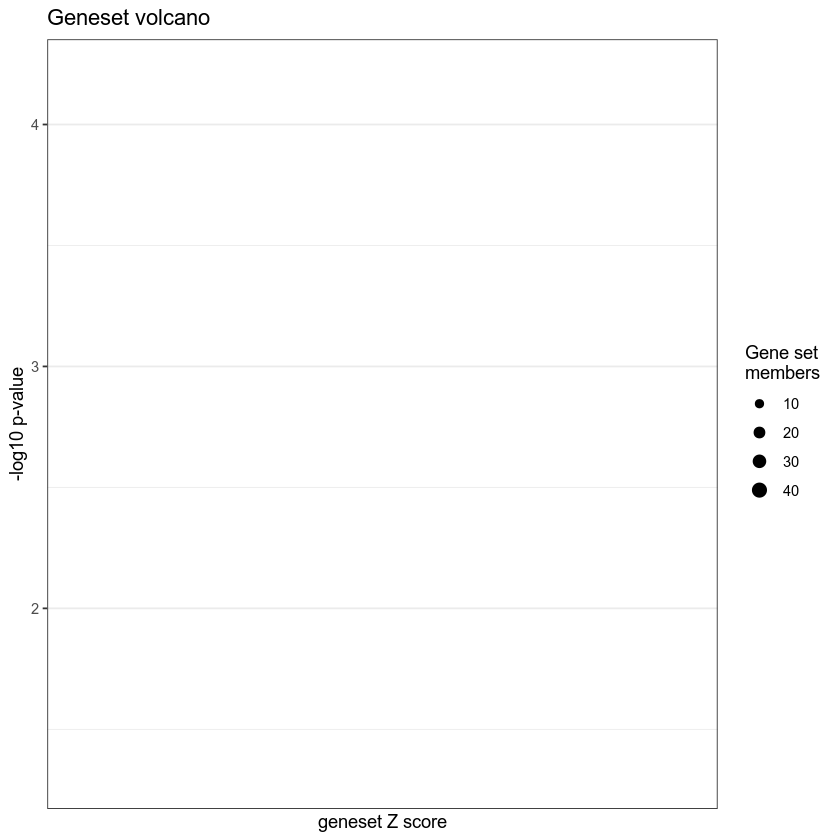

In [66]:
gs_volcano(res_enrich = res_enrich_scores)

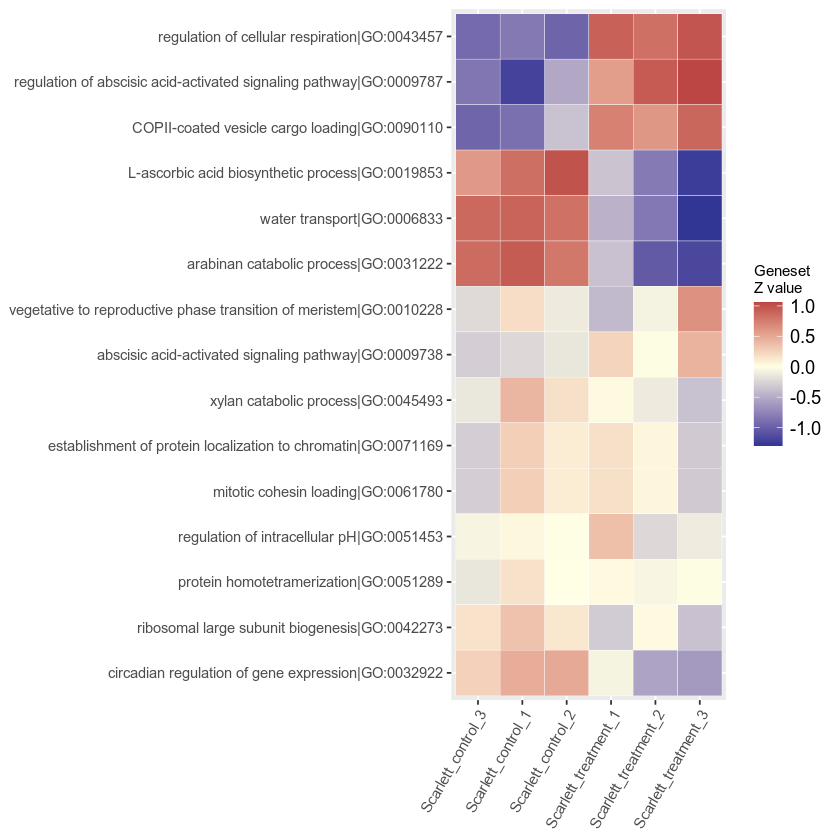

In [555]:
myvst <- vst(dea_Hordeum_vulgare)

#myvst

gss_mat <- gs_scores(
  se = myvst,
  res_de = results_dea_Hordeum_vulgare,
  res_enrich = res_enrich_scores_filtered,
  annotation_obj = anno_df
)

gs_scoresheat(
  gss_mat,
  n_gs = 15
)

In [551]:
res_enrich_scores[73,]

,gs_id,gs_description,gs_pvalue,gs_genes,gs_de_count,gs_bg_count,Expected,DE_count,z_score,aggr_score
,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
GO:0019852,GO:0019852,L-ascorbic acid metabolic process,0.1181,HORVU2Hr1G100100,4,6,0.71,1,1,0.7521777


In [62]:
#res_enrich_scores_filtered <- res_enrich_scores
need_removed <- c()

for (i in seq_len(nrow(res_enrich_scores))) {

  genes <- unlist(strsplit(res_enrich_scores[i, "gs_genes"], ","))
  if (length(genes) < 2){
    need_removed <- c(need_removed, i)
  }
}

res_enrich_scores_filtered <- res_enrich_scores[-need_removed,]



In [61]:
#seq_len(nrow(res_enrich_scores))
thisset_members <- unlist(strsplit(res_enrich_scores[1, "gs_genes"], ","))
length(thisset_members)

thisset_members_ids <- anno_df$gene_id[match(thisset_members, anno_df$gene_name)]
thisset_members_ids


mydata <- assay(myvst)
rowsd_se <- matrixStats::rowSds(mydata)
rowavg_se <- rowMeans(mydata)
mydata_z <- (mydata - rowavg_se)/rowsd_se


thisset_zs <- mydata_z[thisset_members_ids, ]

thisset_zs

thisset_mean_zs <- colMeans(thisset_zs)

thisset_mean_zs

[1] 6

[1] NA NA NA NA NA NA

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'assay': object 'myvst' not found


In [42]:
#?gs_scores

In [63]:
#final part - GeneTonic object
GeneTonic(dds = dea_Hordeum_vulgare,
         res_de = results_dea_Hordeum_vulgare,
         res_enrich = res_enrich_scores_filtered,
          #res_enrich=res_enrich_allRes,
          annotation_obj = anno_df,
          project_id = "myGeneTonic")

Removing 0/2016 rows from the DE `res_de` object - log2FC values detected as NA

This Font Awesome icon ('question-circle') does not exist:
* if providing a custom `html_dependency` these `name` checks can 
  be deactivated with `verify_fa = FALSE`

This Font Awesome icon ('info-circle') does not exist:
* if providing a custom `html_dependency` these `name` checks can 
  be deactivated with `verify_fa = FALSE`

This Font Awesome icon ('cogs') does not exist:
* if providing a custom `html_dependency` these `name` checks can 
  be deactivated with `verify_fa = FALSE`

The `name` provided ('home') is deprecated in Font Awesome 6:
* please consider using 'house' or 'fas fa-house' instead
* use the `verify_fa = FALSE` to deactivate these messages

This Font Awesome icon ('share-alt-square') does not exist:
* if providing a custom `html_dependency` these `name` checks can 
  be deactivated with `verify_fa = FALSE`

This Font Awesome icon ('project-diagram') does not exist:
* if providing a c

In [40]:
#?GeneTonic

## with macrophage

In [236]:
#if (!require("BiocManager", quietly = TRUE))
#    install.packages("BiocManager")

#BiocManager::install("macrophage")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.14 (BiocManager 1.30.18), R 4.1.3 (2022-03-10)

Installing package(s) 'BiocVersion', 'macrophage'

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'AnnotationDbi', 'backbone', 'BiocFileCache', 'biomaRt', 'clue',
  'farver', 'GeneTonic', 'GenomeInfoDb', 'htmltools', 'igraph', 'later',
  'limma', 'NMF', 'pcaExplorer', 'pkgload', 'PoissonBinomial', 'Rcpp',
  'RcppArmadillo', 'rlang', 'RSQLite', 'S4Vectors', 'sass', 'stringi', 'xfun'



In [424]:
library(macrophage)
#library("DESeq2")

data("gse", package = "macrophage")

dds_macrophage <- DESeqDataSet(gse, design = ~line + condition)
# changing the ids to Ensembl instead of the Gencode used in the object

rownames(dds_macrophage) <- substr(rownames(dds_macrophage), 1, 15)
dds_macrophage

#rowData(dds_macrophage)

using counts and average transcript lengths from tximeta



class: DESeqDataSet 
dim: 58294 24 
metadata(7): tximetaInfo quantInfo ... txdbInfo version
assays(3): counts abundance avgTxLength
rownames(58294): ENSG00000000003 ENSG00000000005 ... ENSG00000285993
  ENSG00000285994
rowData names(2): gene_id SYMBOL
colnames(24): SAMEA103885102 SAMEA103885347 ... SAMEA103885308
  SAMEA103884949
colData names(15): names sample_id ... condition line

In [394]:
rowData(dds_macrophage)

DataFrame with 58294 rows and 2 columns
                           gene_id      SYMBOL
                       <character> <character>
ENSG00000000003 ENSG00000000003.14      TSPAN6
ENSG00000000005  ENSG00000000005.5        TNMD
ENSG00000000419 ENSG00000000419.12        DPM1
ENSG00000000457 ENSG00000000457.13       SCYL3
ENSG00000000460 ENSG00000000460.16    C1orf112
...                            ...         ...
ENSG00000285990  ENSG00000285990.1          NA
ENSG00000285991  ENSG00000285991.1      RAET1E
ENSG00000285992  ENSG00000285992.1          NA
ENSG00000285993  ENSG00000285993.1          NA
ENSG00000285994  ENSG00000285994.1          NA

In [395]:
data("res_de_macrophage")
res_macrophage_IFNg_vs_naive %>%
#  as.data.frame() %>%
  head()
#  filter(is.na(.))

log2 fold change (MLE): condition IFNg vs naive 
Wald test p-value: condition IFNg vs naive 
DataFrame with 6 rows and 7 columns
                 baseMean log2FoldChange     lfcSE      stat      pvalue
                <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSG00000000003   171.571     -0.2822450 0.3005710   0.00000 1.00000e+00
ENSG00000000419   967.751      0.0391223 0.0859708   0.00000 1.00000e+00
ENSG00000000457   682.433      1.2846179 0.1969067   1.44545 1.48333e-01
ENSG00000000460   262.963     -1.4718762 0.2186916  -2.15772 3.09493e-02
ENSG00000000938  2660.102      0.6754781 0.2360530   0.00000 1.00000e+00
ENSG00000000971  3052.123      4.9871107 0.4964284   8.03159 9.62155e-16
                       padj      SYMBOL
                  <numeric> <character>
ENSG00000000003 1.00000e+00      TSPAN6
ENSG00000000419 1.00000e+00        DPM1
ENSG00000000457 1.00000e+00       SCYL3
ENSG00000000460 4.09728e-01    C1orf112
ENSG00000000938 1.00000e+00         FGR
ENSG000

In [425]:
data("res_enrich_macrophage")
head(topgoDE_macrophage_IFNg_vs_naive, 2)

res_enrich_macrophage <- shake_topGOtableResult(topgoDE_macrophage_IFNg_vs_naive)

head(res_enrich_macrophage)

,GO.ID,Term,Annotated,Significant,Expected,Rank in p.value_classic,p.value_elim,p.value_classic,genes
,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<chr>
1,GO:0002250,adaptive immune response,323,89,17.93,5,9.2e-23,NA,"B2M,BCL6,BTN3A1,BTN3A2,BTN3A3,C1QB,C1R,C1RL,C1S,C2,C3,C4A,C4B,CD1A,CD1C,CD274,CD28,CD40,CD7,CD74,CD80,CEACAM1,CLEC10A,CLEC6A,CTLA4,CTSS,ERAP2,EXO1,FGL1,FGL2,GCNT3,GPR183,HLA-A,HLA-B,HLA-C,HLA-DMA,HLA-DMB,HLA-DOA,HLA-DOB,HLA-DPA1,HLA-DPB1,HLA-DQA1,HLA-DQB1,HLA-DQB2,HLA-DRA,HLA-DRB1,HLA-DRB5,HLA-E,HLA-F,HLA-G,ICAM1,IL12A,IL12RB1,IL18BP,IL27,IRF1,IRF7,ITK,JAK2,JAK3,KLRK1,LAG3,LAMP3,LILRA1,LILRB3,LYN,MCOLN2,P2RX7,PDCD1,PDCD1LG2,RELB,RIPK2,RNF19B,RSAD2,SERPING1,SIT1,SLAMF1,SLAMF6,SLAMF7,SLC11A1,TAP1,TAP2,TBX21,TLR8,TNFRSF11A,TNFRSF21,TNFSF13B,TNFSF18,ZC3H12A"
2,GO:0060333,interferon-gamma-mediated signaling pathway,82,34,4.55,18,1.2e-20,9.9e-22,"B2M,CAMK2D,CIITA,GBP1,GBP2,HLA-A,HLA-B,HLA-C,HLA-DPA1,HLA-DPB1,HLA-DQA1,HLA-DQB1,HLA-DQB2,HLA-DRA,HLA-DRB1,HLA-DRB5,HLA-E,HLA-F,HLA-G,ICAM1,IRF1,IRF7,JAK2,MT2A,NLRC5,NMI,OAS2,PARP14,PML,SOCS1,STAT1,TRIM22,TRIM31,VCAM1"


Found 500 gene sets in `topGOtableResult` object.

Converting for usage in GeneTonic...



,gs_id,gs_description,gs_pvalue,gs_genes,gs_de_count,gs_bg_count,Expected
,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<dbl>
GO:0002250,GO:0002250,adaptive immune response,9.2e-23,"B2M,BCL6,BTN3A1,BTN3A2,BTN3A3,C1QB,C1R,C1RL,C1S,C2,C3,C4A,C4B,CD1A,CD1C,CD274,CD28,CD40,CD7,CD74,CD80,CEACAM1,CLEC10A,CLEC6A,CTLA4,CTSS,ERAP2,EXO1,FGL1,FGL2,GCNT3,GPR183,HLA-A,HLA-B,HLA-C,HLA-DMA,HLA-DMB,HLA-DOA,HLA-DOB,HLA-DPA1,HLA-DPB1,HLA-DQA1,HLA-DQB1,HLA-DQB2,HLA-DRA,HLA-DRB1,HLA-DRB5,HLA-E,HLA-F,HLA-G,ICAM1,IL12A,IL12RB1,IL18BP,IL27,IRF1,IRF7,ITK,JAK2,JAK3,KLRK1,LAG3,LAMP3,LILRA1,LILRB3,LYN,MCOLN2,P2RX7,PDCD1,PDCD1LG2,RELB,RIPK2,RNF19B,RSAD2,SERPING1,SIT1,SLAMF1,SLAMF6,SLAMF7,SLC11A1,TAP1,TAP2,TBX21,TLR8,TNFRSF11A,TNFRSF21,TNFSF13B,TNFSF18,ZC3H12A",89,323,17.93
GO:0060333,GO:0060333,interferon-gamma-mediated signaling pathway,1.2e-20,"B2M,CAMK2D,CIITA,GBP1,GBP2,HLA-A,HLA-B,HLA-C,HLA-DPA1,HLA-DPB1,HLA-DQA1,HLA-DQB1,HLA-DQB2,HLA-DRA,HLA-DRB1,HLA-DRB5,HLA-E,HLA-F,HLA-G,ICAM1,IRF1,IRF7,JAK2,MT2A,NLRC5,NMI,OAS2,PARP14,PML,SOCS1,STAT1,TRIM22,TRIM31,VCAM1",34,82,4.55
GO:0060337,GO:0060337,type I interferon signaling pathway,4.8e-13,"GBP2,HLA-A,HLA-B,HLA-C,HLA-E,HLA-F,HLA-G,IFI27,IFI35,IFIT2,IFIT3,IFITM1,IFITM2,IFITM3,IRF1,IRF7,ISG20,NLRC5,OAS2,PSMB8,RSAD2,STAT1,STAT2,XAF1,ZBP1",25,80,4.44
GO:0019885,GO:0019885,antigen processing and presentation of endogenous peptide antigen via MHC class I,4.2e-12,"B2M,ERAP2,HLA-A,HLA-B,HLA-C,HLA-E,HLA-F,HLA-G,TAP1,TAP2,TAPBP",11,14,0.78
GO:0051607,GO:0051607,defense response to virus,2.0e-10,"AIM2,APOBEC3A,APOBEC3D,APOBEC3G,CD40,CXCL10,CXCL9,DDX60,DTX3L,FGL2,GBP1,GBP3,IFI27,IFI44L,IFIH1,IFIT2,IFIT3,IFIT5,IFITM1,IFITM2,IFITM3,IL12RB1,IL15,IL27,IRF1,IRF7,ISG20,NLRC5,OAS2,PMAIP1,PML,RSAD2,RTP4,SERINC5,STAT1,STAT2,TLR7,TLR8,TRIM22,TSPAN32,ZC3H12A",41,206,11.44
GO:0001916,GO:0001916,positive regulation of T cell mediated cytotoxicity,5.6e-10,"B2M,CD1A,CD1C,HLA-A,HLA-B,HLA-C,HLA-E,HLA-F,HLA-G,IL12A,IL12RB1,P2RX7",12,23,1.28


In [256]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("org.Hs.eg.db")

Bioconductor version '3.14' is out-of-date; the current release version '3.15'
  is available with R version '4.2'; see https://bioconductor.org/install

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.14 (BiocManager 1.30.18), R 4.1.3 (2022-03-10)

Installing package(s) 'org.Hs.eg.db'

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'AnnotationDbi', 'backbone', 'BiocFileCache', 'biomaRt', 'clue',
  'farver', 'GeneTonic', 'GenomeInfoDb', 'htmltools', 'igraph', 'later',
  'limma', 'NMF', 'pcaExplorer', 'pkgload', 'PoissonBinomial', 'Rcpp',
  'RcppArmadillo', 'rlang', 'RSQLite', 'S4Vectors', 'sass', 'stringi', 'xfun'



In [426]:
library(org.Hs.eg.db)

anno_df <- data.frame(
  gene_id = rownames(dds_macrophage),
  gene_name = mapIds(org.Hs.eg.db, keys = rownames(dds_macrophage), column = "SYMBOL", keytype = "ENSEMBL"),
  stringsAsFactors = FALSE,
  row.names = rownames(dds_macrophage)
)

head(anno_df)

'select()' returned 1:many mapping between keys and columns



,gene_id,gene_name
,<chr>,<chr>
ENSG00000000003,ENSG00000000003,TSPAN6
ENSG00000000005,ENSG00000000005,TNMD
ENSG00000000419,ENSG00000000419,DPM1
ENSG00000000457,ENSG00000000457,SCYL3
ENSG00000000460,ENSG00000000460,C1orf112
ENSG00000000938,ENSG00000000938,FGR


In [427]:
res_enrich_macrophage <- get_aggrscores(res_enrich = res_enrich_macrophage,
                                        res_de = res_macrophage_IFNg_vs_naive,
                                        annotation_obj = anno_df,
                                        aggrfun = mean)

In [399]:
res_enrich_macrophage %>%
  #filter(!is.na(z_score)) %>%
  filter(is.na(aggr_score)) %>%
  head()

gs_id,gs_description,gs_pvalue,gs_genes,gs_de_count,gs_bg_count,Expected,DE_count,z_score,aggr_score
<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>


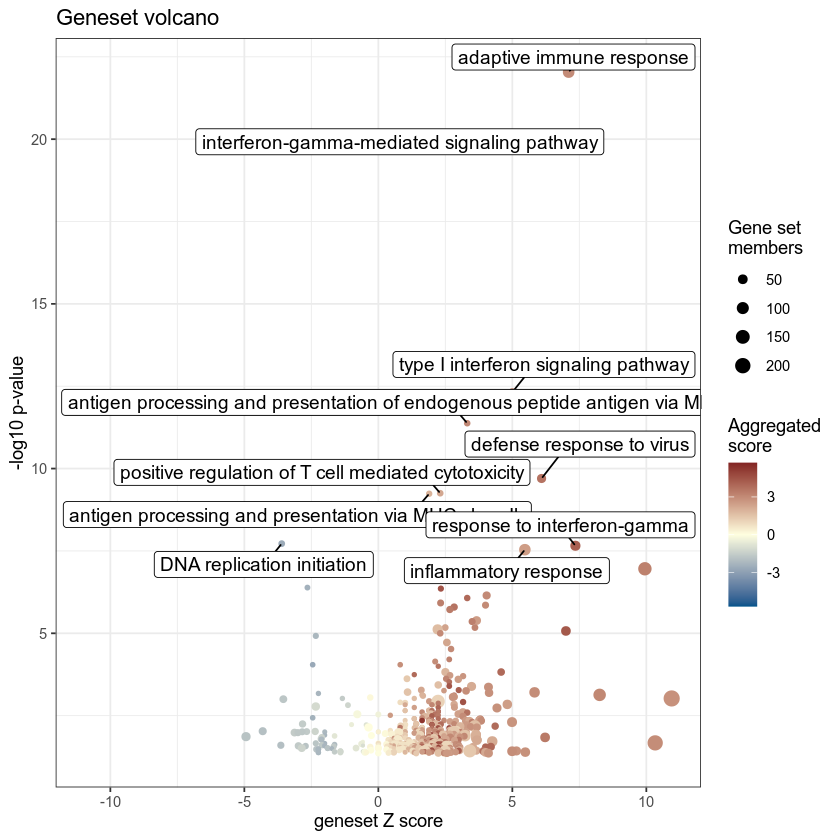

In [428]:
gs_volcano(res_enrich = res_enrich_macrophage)

In [400]:
GeneTonic(dds = dds_macrophage,
          res_de = res_macrophage_IFNg_vs_naive,
          res_enrich = res_enrich_macrophage,
          annotation_obj = anno_df,
          project_id = "GT1")

Warning message in checkup_GeneTonic(dds, res_de, res_enrich, annotation_obj):
“Could not find size factors for the provided `dds` object...
Please compute them first by calling
'dds <- estimateSizeFactors(dds)'”
Removing 0/17806 rows from the DE `res_de` object - log2FC values detected as NA

This Font Awesome icon ('question-circle') does not exist:
* if providing a custom `html_dependency` these `name` checks can 
  be deactivated with `verify_fa = FALSE`

This Font Awesome icon ('info-circle') does not exist:
* if providing a custom `html_dependency` these `name` checks can 
  be deactivated with `verify_fa = FALSE`

The `name` provided ('home') is deprecated in Font Awesome 6:
* please consider using 'house' or 'fas fa-house' instead
* use the `verify_fa = FALSE` to deactivate these messages

This Font Awesome icon ('share-alt-square') does not exist:
* if providing a custom `html_dependency` these `name` checks can 
  be deactivated with `verify_fa = FALSE`

This Font Awesome ico

## code for pipeline

In [1]:
library(GeneTonic)
#library(pcaExplorer)
library(topGO)

library(dplyr)
library(stringr)
library(tidyr)
library(DESeq2)



Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: graph

Loading required package: Biobase

Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Loading required package: GO.db

Loading required package: AnnotationDbi

Loading required package: stats4

Loading r

In [2]:
#part1
dea_Hordeum_vulgare <- readRDS("final_dea_Hordeum_vulgare")

rowData(dea_Hordeum_vulgare) <- rowData(dea_Hordeum_vulgare) %>%
  as.data.frame() %>%
  mutate(gene_id=rownames(.), SYMBOL=rownames(.)) %>%
  dplyr::select(gene_id, SYMBOL)

In [3]:
#part2
dea_Hordeum_vulgare_filtered <- readRDS("final_dea_Hordeum_vulgare")
keep <- rowSums(counts(dea_Hordeum_vulgare_filtered) >= 10) >= 6
dea_Hordeum_vulgare_filtered <- dea_Hordeum_vulgare_filtered[keep, ]

results_dea_Hordeum_vulgare <- results(dea_Hordeum_vulgare_filtered)

results_dea_Hordeum_vulgare$SYMBOL <- rownames(rowData(dea_Hordeum_vulgare_filtered))

In [4]:
#part 3 res_enrich -need to create seperate for all ontologies

SFA <- readRDS("species_functional_annotation.rds")

#quick solution to generate an all OGs set (no singletons! for now)
SFA_species <- SFA[["Hordeum_vulgare"]]



all_set <- bind_rows(SFA_species) %>%
  dplyr::select(`Protein-Accession`, `Gene-Ontology-Term`) %>%
  #we should remove all rows that have NO GO terms associated
  #and remove all NAs from the Gene-Ontology-Term column if they have at least 1 GO term
  #remove inline NAs in Gene-Ontology-Term column
  mutate(
    `Gene-Ontology-Term` = str_remove_all(`Gene-Ontology-Term`, "NA, |, NA") 
  ) %>% 
  #remove lines with only NA in Gene-Ontology-Term column
  filter(!str_detect(`Gene-Ontology-Term`, 'NA'))

In [5]:
universe <- all_set %>%
      mutate(universe_list = setNames(.[["Gene-Ontology-Term"]], pull(.["Protein-Accession"]))) %>%
      pull(universe_list)

#important to create true gene 2 GO mapping; GO column char vector!
universe <- universe %>%
  strsplit(split = ", ")

In [6]:
#reverse - all genes per GO term
genes_per_GO <- all_set %>%
      #reverse set for enrich table should only consist of genes with actual expression
      filter(`Protein-Accession` %in% rownames(results_dea_Hordeum_vulgare)) %>%
      #normal formatting
      separate_rows(`Gene-Ontology-Term`, sep = ", ") %>%
      group_by(`Gene-Ontology-Term`) %>% 
      summarise(`Protein-Accession` = paste(`Protein-Accession`, collapse = ",")) %>%
      mutate(reverse_all_set = setNames(.[["Protein-Accession"]], pull(.["Gene-Ontology-Term"]))) %>%
      pull(reverse_all_set)

In [7]:
#whatever is compared to the universe it is always a subset of it!
#results_dea_Hordeum_vulgare <- results(dea_Hordeum_vulgare)
#results_dea_Hordeum_vulgare$SYMBOL <- rowData(dea_Hordeum_vulgare)$SYMBOL

int_set_df <- results_dea_Hordeum_vulgare %>%
  as.data.frame() %>%
  mutate(id = rownames(.)) %>%
  filter(padj <= 0.1)

int_set <- int_set_df %>% pull(id)

inGenes <- factor(as.integer(names(universe) %in% int_set))
names(inGenes) <- names(universe)

In [25]:
GOdata_BP <- new("topGOdata", 
              ontology="BP", 
              allGenes=inGenes,
              annot=annFUN.gene2GO, 
              gene2GO=universe)

GOdata_MF <- new("topGOdata", 
              ontology="MF", 
              allGenes=inGenes,
              annot=annFUN.gene2GO, 
              gene2GO=universe)

GOdata_CC <- new("topGOdata", 
              ontology="CC", 
              allGenes=inGenes,
              annot=annFUN.gene2GO, 
              gene2GO=universe)


Building most specific GOs .....

	( 2194 GO terms found. )


Build GO DAG topology ..........

	( 4472 GO terms and 9398 relations. )


Annotating nodes ...............

	( 4374 genes annotated to the GO terms. )


Building most specific GOs .....

	( 1391 GO terms found. )


Build GO DAG topology ..........

	( 1827 GO terms and 2330 relations. )


Annotating nodes ...............

	( 4701 genes annotated to the GO terms. )


Building most specific GOs .....

	( 510 GO terms found. )


Build GO DAG topology ..........

	( 747 GO terms and 1300 relations. )


Annotating nodes ...............

	( 4220 genes annotated to the GO terms. )



In [49]:
#####
#BP
#####
#Perform Fisher's exact test:
resultFisher_BP <- runTest(GOdata_BP, algorithm="weight01", statistic = "fisher")
#We can list the top significant results found:
allRes_BP <- GenTable(GOdata, classicFisher = resultFisher_BP, orderBy = "resultFisher", topNodes = 500, numChar=1000)

allRes_BP <- allRes_BP %>%
  dplyr::rename(p.value_classic = classicFisher) %>%
  mutate(p.value_classic = as.numeric(p.value_classic)) %>%
  #safety for unwanted GO terms
  filter(GO.ID %in% names(genes_per_GO)) %>%
  rowwise() %>%
  #if elim or another algorithm that adds related GO terms were used, we would need to catch these instances with case_when...
  mutate(genes = genes_per_GO[[GO.ID]])


#final step for part3 - get this into GeneTonic format
res_enrich_allRes_BP <- shake_topGOtableResult(obj = allRes_BP, p_value_column = "p.value_classic")



#####
#MF
#####
#Perform Fisher's exact test:
resultFisher_MF <- runTest(GOdata_MF, algorithm="weight01", statistic = "fisher")
#We can list the top significant results found:
allRes_MF <- GenTable(GOdata_MF, classicFisher = resultFisher_MF, orderBy = "resultFisher", topNodes = 500, numChar=1000)

allRes_MF <- allRes_MF %>%
  dplyr::rename(p.value_classic = classicFisher) %>%
  mutate(p.value_classic = as.numeric(p.value_classic)) %>%
  #safety for unwanted GO terms
  filter(GO.ID %in% names(genes_per_GO)) %>%
  rowwise() %>%
  #if elim or another algorithm that adds related GO terms were used, we would need to catch these instances with case_when...
  mutate(genes = genes_per_GO[[GO.ID]])


#final step for part3 - get this into GeneTonic format
res_enrich_allRes_MF <- shake_topGOtableResult(obj = allRes_MF, p_value_column = "p.value_classic")


#####
#CC
#####
#Perform Fisher's exact test:
#resultFisher <- runTest(GOdata, algorithm="weight01", statistic="fisher")
resultFisher_CC <- runTest(GOdata_CC, algorithm="weight01", statistic = "fisher")
#We can list the top significant results found:
allRes_CC <- GenTable(GOdata_CC, classicFisher = resultFisher_CC, orderBy = "resultFisher", topNodes = 500, numChar=1000)

allRes_CC <- allRes_CC %>%
  dplyr::rename(p.value_classic = classicFisher) %>%
  mutate(p.value_classic = as.numeric(p.value_classic)) %>%
  #safety for unwanted GO terms
  filter(GO.ID %in% names(genes_per_GO)) %>%
  rowwise() %>%
  #if elim or another algorithm that adds related GO terms were used, we would need to catch these instances with case_when...
  mutate(genes = genes_per_GO[[GO.ID]])


#final step for part3 - get this into GeneTonic format
res_enrich_allRes_CC <- shake_topGOtableResult(obj = allRes_CC, p_value_column = "p.value_classic")


			 -- Weight01 Algorithm -- 

		 the algorithm is scoring 2296 nontrivial nodes
		 parameters: 
			 test statistic: fisher


	 Level 16:	3 nodes to be scored	(0 eliminated genes)


	 Level 15:	5 nodes to be scored	(0 eliminated genes)


	 Level 14:	22 nodes to be scored	(2 eliminated genes)


	 Level 13:	41 nodes to be scored	(5 eliminated genes)


	 Level 12:	78 nodes to be scored	(20 eliminated genes)


	 Level 11:	132 nodes to be scored	(150 eliminated genes)


	 Level 10:	228 nodes to be scored	(396 eliminated genes)


	 Level 9:	293 nodes to be scored	(920 eliminated genes)


	 Level 8:	313 nodes to be scored	(1490 eliminated genes)


	 Level 7:	337 nodes to be scored	(1974 eliminated genes)


	 Level 6:	365 nodes to be scored	(2903 eliminated genes)


	 Level 5:	252 nodes to be scored	(3388 eliminated genes)


	 Level 4:	138 nodes to be scored	(3760 eliminated genes)


	 Level 3:	69 nodes to be scored	(4055 eliminated genes)


	 Level 2:	19 nodes to be scored	(4280 eliminated g

In [50]:
#part 4
anno_df <- SFA_species %>%
  dplyr::select(`Protein-Accession`) %>%
  dplyr::rename(gene_id=`Protein-Accession`) %>%
  mutate(gene_name = gene_id) %>%
  as.data.frame()

rownames(anno_df) <- anno_df$gene_id

In [54]:
#enrich scores
res_enrich_scores_BP <- get_aggrscores(res_enrich = res_enrich_allRes_BP,
                                    res_de = results_dea_Hordeum_vulgare,
                                    annotation_obj = anno_df,
                                    aggrfun = mean)

res_enrich_scores_MF <- get_aggrscores(res_enrich = res_enrich_allRes_MF,
                                    res_de = results_dea_Hordeum_vulgare,
                                    annotation_obj = anno_df,
                                    aggrfun = mean)

res_enrich_scores_CC <- get_aggrscores(res_enrich = res_enrich_allRes_CC,
                                    res_de = results_dea_Hordeum_vulgare,
                                    annotation_obj = anno_df,
                                    aggrfun = mean)

#remove cases of single genes for a GO term
need_removed_BP <- c()
need_removed_MF <- c()
need_removed_CC <- c()

for (i in seq_len(nrow(res_enrich_scores_BP))) {

  genes <- unlist(strsplit(res_enrich_scores_BP[i, "gs_genes"], ","))
  if (length(genes) < 2){
    need_removed_BP <- c(need_removed_BP, i)
  }
}

for (i in seq_len(nrow(res_enrich_scores_MF))) {

  genes <- unlist(strsplit(res_enrich_scores_MF[i, "gs_genes"], ","))
  if (length(genes) < 2){
    need_removed_MF <- c(need_removed_MF, i)
  }
}

for (i in seq_len(nrow(res_enrich_scores_CC))) {

  genes <- unlist(strsplit(res_enrich_scores_CC[i, "gs_genes"], ","))
  if (length(genes) < 2){
    need_removed_CC <- c(need_removed_CC, i)
  }
}

res_enrich_scores_BP_filtered <- res_enrich_scores_BP[-need_removed_BP,]
res_enrich_scores_MF_filtered <- res_enrich_scores_MF[-need_removed_MF,]
res_enrich_scores_CC_filtered <- res_enrich_scores_CC[-need_removed_CC,]

In [28]:
#final part - GeneTonic object BP
GeneTonic(dds = dea_Hordeum_vulgare,
          res_de = results_dea_Hordeum_vulgare,
          res_enrich = res_enrich_scores_BP_filtered,
          annotation_obj = anno_df,
          project_id = "myGeneTonic")

Removing 0/2016 rows from the DE `res_de` object - log2FC values detected as NA

This Font Awesome icon ('question-circle') does not exist:
* if providing a custom `html_dependency` these `name` checks can 
  be deactivated with `verify_fa = FALSE`

This Font Awesome icon ('info-circle') does not exist:
* if providing a custom `html_dependency` these `name` checks can 
  be deactivated with `verify_fa = FALSE`

This Font Awesome icon ('cogs') does not exist:
* if providing a custom `html_dependency` these `name` checks can 
  be deactivated with `verify_fa = FALSE`

The `name` provided ('home') is deprecated in Font Awesome 6:
* please consider using 'house' or 'fas fa-house' instead
* use the `verify_fa = FALSE` to deactivate these messages

This Font Awesome icon ('share-alt-square') does not exist:
* if providing a custom `html_dependency` these `name` checks can 
  be deactivated with `verify_fa = FALSE`

This Font Awesome icon ('project-diagram') does not exist:
* if providing a c

In [55]:
#final part - GeneTonic object MF
GeneTonic(dds = dea_Hordeum_vulgare,
          res_de = results_dea_Hordeum_vulgare,
          res_enrich = res_enrich_scores_MF_filtered,
          annotation_obj = anno_df,
          project_id = "myGeneTonic")

Removing 0/2016 rows from the DE `res_de` object - log2FC values detected as NA

This Font Awesome icon ('question-circle') does not exist:
* if providing a custom `html_dependency` these `name` checks can 
  be deactivated with `verify_fa = FALSE`

This Font Awesome icon ('info-circle') does not exist:
* if providing a custom `html_dependency` these `name` checks can 
  be deactivated with `verify_fa = FALSE`

This Font Awesome icon ('cogs') does not exist:
* if providing a custom `html_dependency` these `name` checks can 
  be deactivated with `verify_fa = FALSE`

The `name` provided ('home') is deprecated in Font Awesome 6:
* please consider using 'house' or 'fas fa-house' instead
* use the `verify_fa = FALSE` to deactivate these messages

This Font Awesome icon ('share-alt-square') does not exist:
* if providing a custom `html_dependency` these `name` checks can 
  be deactivated with `verify_fa = FALSE`

This Font Awesome icon ('project-diagram') does not exist:
* if providing a c

In [56]:
#final part - GeneTonic object CC
GeneTonic(dds = dea_Hordeum_vulgare,
          res_de = results_dea_Hordeum_vulgare,
          res_enrich = res_enrich_scores_CC_filtered,
          annotation_obj = anno_df,
          project_id = "myGeneTonic")

Removing 0/2016 rows from the DE `res_de` object - log2FC values detected as NA

This Font Awesome icon ('question-circle') does not exist:
* if providing a custom `html_dependency` these `name` checks can 
  be deactivated with `verify_fa = FALSE`

This Font Awesome icon ('info-circle') does not exist:
* if providing a custom `html_dependency` these `name` checks can 
  be deactivated with `verify_fa = FALSE`

This Font Awesome icon ('cogs') does not exist:
* if providing a custom `html_dependency` these `name` checks can 
  be deactivated with `verify_fa = FALSE`

The `name` provided ('home') is deprecated in Font Awesome 6:
* please consider using 'house' or 'fas fa-house' instead
* use the `verify_fa = FALSE` to deactivate these messages

This Font Awesome icon ('share-alt-square') does not exist:
* if providing a custom `html_dependency` these `name` checks can 
  be deactivated with `verify_fa = FALSE`

This Font Awesome icon ('project-diagram') does not exist:
* if providing a c

### list object for output & sharing


In [17]:
GeneTonic::GeneTonic_list

function (dds, res_de, res_enrich, annotation_obj) 
{
    checkup_GeneTonic(dds, res_de, res_enrich, annotation_obj)
    gtl <- list(dds = dds, res_de = res_de, res_enrich = res_enrich, 
        annotation_obj = annotation_obj)
    describe_gtl(gtl)
    return(gtl)
}
<bytecode: 0x555a62aa7218>
<environment: namespace:GeneTonic>

In [57]:
gtl_BP <- GeneTonic_list(
  dds = DESeq2::estimateSizeFactors(dea_Hordeum_vulgare),
  res_de = results_dea_Hordeum_vulgare,
  res_enrich = res_enrich_scores_BP_filtered,
  annotation_obj = anno_df
)

gtl_MF <- GeneTonic_list(
  dds = DESeq2::estimateSizeFactors(dea_Hordeum_vulgare),
  res_de = results_dea_Hordeum_vulgare,
  res_enrich = res_enrich_scores_MF_filtered,
  annotation_obj = anno_df
)

gtl_CC <- GeneTonic_list(
  dds = DESeq2::estimateSizeFactors(dea_Hordeum_vulgare),
  res_de = results_dea_Hordeum_vulgare,
  res_enrich = res_enrich_scores_CC_filtered,
  annotation_obj = anno_df
)

saveRDS(object = gtl_BP, file = "genetonic_gtl_BP")
saveRDS(object = gtl_MF, file = "genetonic_gtl_MF")
saveRDS(object = gtl_CC, file = "genetonic_gtl_CC")

using 'avgTxLength' from assays(dds), correcting for library size

---------------------------------

----- GeneTonic list object -----

---------------------------------


----- dds object -----

Providing an expression object (as DESeqDataset) of 6518 features over 6 samples


----- res_de object -----

Providing a DE result object (as DESeqResults), 2016 features tested, 617 found as DE

Upregulated:     294

Downregulated:   323


----- res_enrich object -----

Providing an enrichment result object, 247 reported


----- annotation_obj object -----

Providing an annotation object of 5919 features with information on 2 identifier types

using 'avgTxLength' from assays(dds), correcting for library size

---------------------------------

----- GeneTonic list object -----

---------------------------------


----- dds object -----

Providing an expression object (as DESeqDataset) of 6518 features over 6 samples


----- res_de object -----

Providing a DE result object (as DESeqResults)

In [58]:
# if nothing is returned, the object is ready to be provided to GeneTonic
checkup_gtl(gtl_MF)

#if (interactive()) {
  GeneTonic(gtl = gtl_MF)
#}

Removing 0/2016 rows from the DE `res_de` object - log2FC values detected as NA

This Font Awesome icon ('question-circle') does not exist:
* if providing a custom `html_dependency` these `name` checks can 
  be deactivated with `verify_fa = FALSE`

This Font Awesome icon ('info-circle') does not exist:
* if providing a custom `html_dependency` these `name` checks can 
  be deactivated with `verify_fa = FALSE`

This Font Awesome icon ('cogs') does not exist:
* if providing a custom `html_dependency` these `name` checks can 
  be deactivated with `verify_fa = FALSE`

The `name` provided ('home') is deprecated in Font Awesome 6:
* please consider using 'house' or 'fas fa-house' instead
* use the `verify_fa = FALSE` to deactivate these messages

This Font Awesome icon ('share-alt-square') does not exist:
* if providing a custom `html_dependency` these `name` checks can 
  be deactivated with `verify_fa = FALSE`

This Font Awesome icon ('project-diagram') does not exist:
* if providing a c